<a href="https://colab.research.google.com/github/AmiMunshi/MachineLearningNew/blob/main/ML_5_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Single Variate Logistic Regression

Problem Statement

To predict if the student will be admitted to a higher education institute based on the GMAT score

In [ ]:
#import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,roc_auc_score
%matplotlib inline

import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/Gmat_logistics_1.csv') #read the dataset

In [ ]:
#Explore the dataset
df.head()

,gmat,admitted
0,780,1
1,750,1
2,690,1
3,710,1
4,680,1


We observe that there are only two columns 

Independent variable is GMAT score

Dependent variables is admitted 


In [ ]:
df.describe()

,gmat,admitted
count,40.000000,40.000000
mean,654.000000,0.525000
std,61.427464,0.505736
min,540.000000,0.000000
25%,607.500000,0.000000
50%,660.000000,1.000000
75%,690.000000,1.000000
max,780.000000,1.000000


In [ ]:
#Check for null entries
print("Number of null values in the data set are - ",df.isnull().values.any().sum())

Number of null values in the data set are -  0


In [ ]:
#Define the independent and dependent variables
y= df['admitted'] #dependent variable is price
x= df.drop(['admitted'], axis=1)

In [ ]:
print(type(y))
print(type(x))

#Note: Dependent variable should be a series and independent variable should be a data frame

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [ ]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Make prediction for the test data
y_pred= modelLogistic.predict(x_test) 

In [ ]:
#predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form
y_pred_proba = modelLogistic.predict_proba(x_test) 

In [ ]:
print(y_pred_proba)

[9.99884680e-01 1.98619472e-04 1.01420625e-06 5.67554977e-01
 1.01420625e-06 5.17780101e-09 9.77908082e-01 9.99999997e-01]


In [ ]:
#Obtain regression coefficients b0 and b1
print("b0= ", modelLogistic.intercept_)
print("b1= ", modelLogistic.coef_)

b0=  [-117.10835789]
b1=  [[0.17735148]]


Model Evaluation

Can be done using accuracy, confusion matrix, roc curve

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[4 0]
 [2 2]]


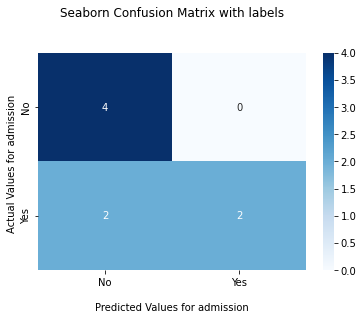

In [ ]:

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values for admission')
ax.set_ylabel('Actual Values for admission ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#Accuracy score
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the model is- ", Accuracy)

Accuracy of the model is-  0.75


In [ ]:
#Accuracy from confusin matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.75


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

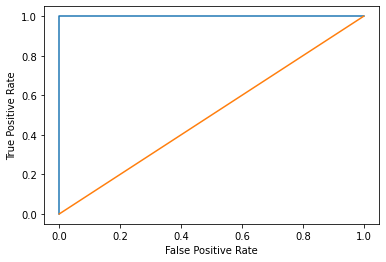

In [ ]:
#Roc curve for logistic model
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

#AUC score
aucLogistic = roc_auc_score(y_test, y_pred_proba)
aucNoModel= roc_auc_score(y_test, random_probs)
#create ROC curve
plt.plot(fpr,tpr,p_fpr,p_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("AUC score with Logistic is {} and without Logistic is {}".format(aucLogistic,aucNoModel))

AUC score with Logistic is 1.0 and without Logistic is 0.5
